# Introduction

language -> numbers

## Definitions

### Tokens

treat the sentence to token (including words and puncuations)

### Letters and Characters

repersent punctuation and whitespace

### Vocabulary

'reasonable' subset of words

### Corpus

datasets used for machine learning models

### N-Gram

n consecutive items (words, subwords, character)

- single: unigram
- bigram
- trigram

# Vector

numerical representation of text

quantity: magnitude + direction

An array of scalars

E.g

- Spam detection
- Organizing Documents

# Bags of words

NLP not consider the sequence of words

# Counting Vecterization

V = vocabulary size -> #of unique words 

V=6 -> each vector has size 6

- help classification

Issues:
- Tokenization: convert a string into a list of words
- Mapping: which words correspound to which vector index

### Normalization

- Make the L2-norm 1
- Divide by the sum = L1-norm

### Coding

In [64]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [65]:
#nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [67]:
df = pd.read_csv('bbc_text_cls.csv')

In [68]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [69]:
inputs = df['text']
labels = df['labels']

<AxesSubplot:>

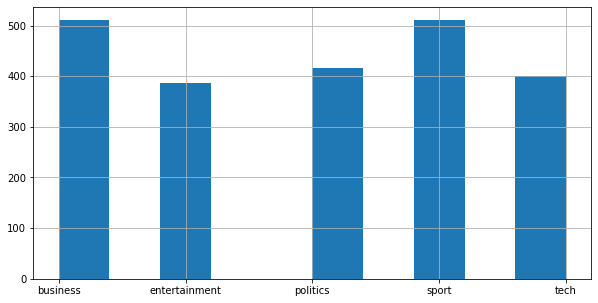

In [71]:
#check if we have unbalance classes
labels.hist(figsize = (10,5))

In [73]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state = 123)

In [76]:
vectorizer = CountVectorizer()

fit_transform for train data because training data is supposed to represent the what we have when build the model,
while test data is supposed to represent what we have to apply the model to unknown data

In [77]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

Xtrain #1668 rows, not very good in  mL

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [80]:
(Xtrain != 0).sum()

337411

In [81]:
Xtrain.shape

(1668, 26287)

In [79]:
#the percentile of values are non-zero
(Xtrain != 0).sum()/np.prod(Xtrain.shape)

0.007695239935415004

In [82]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9712746858168761


In [86]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')

Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


#### with lemma

In [87]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos = get_wordnet_pos(tag))\
               for word, tag in words_and_tags]

In [88]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9676840215439856


slow process, test score dropped

#### with stemming

In [90]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [91]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9892086330935251
test score: 0.9694793536804309


In [92]:
def simple_tokenizer(s):
    return s.split()

In [94]:
#string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9952038369304557
test score: 0.9712746858168761


simple split is resonablt choice

Try unless got better results

Each methods yields different dimentions of Xtrain

# Tokenization

#### Punctuation

maybe together with last word of string aplit
E.g "cats." and "cats?" are different

#### Casing

case-insientive -> to lower case of all words


#### Accents

### Character-Based Tokenization

Pros and cons:
- a lot words
- words contain lots of info, but characters do NOT lots of info
- if character: inly small letters(26）

### Subword-based Tokenization

middle ground between word-based and character-based

model will learn the similarity throuth the data(e.g walk ~ walking)

# Stopwords

conmon words: it, and...
    
Are they useful? NO

- High dimensionality is bad
- Distance consideration

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

### NLTK Stopwords

In [11]:
import nltk #doing other language than english

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords

In [14]:
stopwords.words("german")

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

# Stemming and Lemmatization 词干提取和词性还原

similar to subword-tokenization

related words -> root words

- Stemming: crude -> chops off the end of words, not good in real worlds
- Lemmatization: actual roots

### Stemming

Based on simple heuristics

In [16]:
#Porter Stemmer in NLTK
from nltk.stem import PorterStemmer

porter = PorterStemmer()
porter.stem("walking")

'walk'

### Lemmatization

as lookuptable

e.g: "Better" -> "Good", "Was/is"->"Be"

but it needs manually identify the word type

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [18]:
#nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("mice")

'mouse'

In [20]:
lemmatizer.lemmatize("going")

'going'

In [22]:
lemmatizer.lemmatize("going", pos = wordnet.VERB)
#POS = part of speech

'go'

### Application

- Search Engines
- Online Ads
 - ads based on keywords

### Code Example

#### Stemming

In [23]:
porter = PorterStemmer()
porter.stem("walking")

'walk'

In [24]:
porter.stem("walked")

'walk'

In [25]:
porter.stem("walks")

'walk'

In [27]:
porter.stem("ran") #no rule

'ran'

In [28]:
porter.stem("running")

'run'

In [29]:
porter.stem("bosses")

'boss'

In [31]:
porter.stem("replacement") #not real words

'replac'

In [33]:
sentence = "Lemmatization is more sophisticated then stemming".split()

for token in sentence:
    print(porter.stem(token), end = " ")

lemmat is more sophist then stem 

In [35]:
porter.stem("unnecessary") #remain distinct words

'unnecessari'

In [36]:
porter.stem("betty")

'betti'

#### Lemmatization

In [41]:
print(lemmatizer.lemmatize("walking")) #pos default id None
print(lemmatizer.lemmatize("walking", pos = wordnet.VERB)) #to verb.

walking
walk


In [43]:
lemmatizer.lemmatize("mice")

'mouse'

In [44]:
lemmatizer.lemmatize("was", pos = wordnet.VERB)

'be'

In [46]:
lemmatizer.lemmatize("better", pos = wordnet.ADJ)

'good'

Automatically identify word type

In [56]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [49]:
#nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [53]:
sentense = "Donald Trump has a devoted following".split()

In [54]:
words_and_tags = nltk.pos_tag(sentense)
words_and_tags

[('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [57]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
    print(lemma, end = " ")

Donald Trump have a devote following 

In [61]:
sentense = "The cat was following the bird as it flew by".split()

In [62]:
words_and_tags = nltk.pos_tag(sentense)
words_and_tags

[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]

In [63]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
    print(lemma, end = " ")

The cat be follow the bird a it fly by 

# Vector Similarity

Application: article spinning

#### Euclidean Distance

use distance to define similarity

Square Euclidean distance help to reduce calculatino ->  just for compare

#### Angle between 2 vectors

Cosine Similarity: (-1,1)
    -1: 180, 1: ~parallel
            
        

Cosine distance = 1 - cosine similarity #not a true distance

if compare dff: cosine better

If normalize the vectors and does not care about the score just the ranking, these two distance equal

# TF-IDF

Problems in CountVectorizer:

- cannot define if stopwords are correct

#### Term Frequency - Inverse Document Frequency

Terms appears frequency/document Frequency

- tf = term frequency
    - #of times t appears in d = CountVectorizer
    - N*V matrix, n documents, v unique terms
- idf = inverse document frequency
    - idf(f) = log(N/Nt)
        - Nt: # of documents term t appears in
        - needs proportion
        - why log? log is monotonic, if N/Nt gets larger, so too will its log and squash its argument
- t = term
- d = document

### Variations

#### TF

- Binary
- Nomalize and count
- Take the log
    -log(1+count(t,d))

#### IDF

- Smooth IDF
    - log(N/Nt+1) + 1
- IDF Max 
    - log(max Nt'/Nt)
- Probabilistic IDF
    - log((N-Nt)/Nt) [logodds = logit]

### Exercise -  build a recommendation system

In [71]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [33]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [36]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

json format string - list

In [35]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [41]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [47]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [51]:
#convert the relevent data for each movie info into a single string to the ingested by TFvec.
def to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    
    return "%s %s" % (genres, keywords)

In [54]:
#create a new string representation of each movie
df['string'] = df.apply(to_string, axis = 1)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [55]:
#create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000)

In [59]:
#create a data matrix from the overviews
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

2000 columns because we set max = 2000

In [58]:
#generate a mapping from movie title to index(in df)
movie2index = pd.Series(df.index, index = df['title'])
movie2index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [61]:
idx = movie2index['Scream 3']
idx

1164

In [62]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [63]:
#print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [65]:
#compute similarity between query and every vector in x
scores = cosine_similarity(query,X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [69]:
#currently the array is 1xN, make it just a 1D array
scores = scores.flatten()

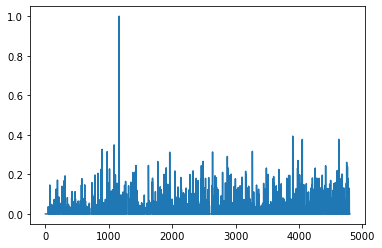

In [72]:
plt.plot(scores)

the extreme is query movie

In [73]:
#sort the score as the plot is random
#decending order
#do not care about the score values, just care about the ranking
(-scores).argsort()

array([1164, 3902, 4628, ..., 1714, 1720, 4802])

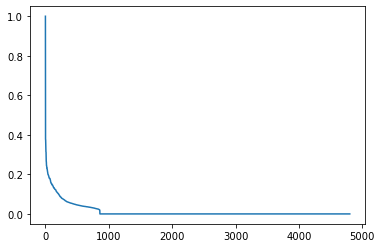

In [75]:
plt.plot(scores[(-scores).argsort()])

In [78]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommend_idx = (-scores).argsort()[1:6]
recommend_idx

array([3902, 4628, 4053, 4048, 1084])

In [80]:
df['title'].iloc[recommend_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [95]:
#create a function that generates recommendations
def recommend(title):
    idx = movie2index[title]
    #some may have the same title
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
        
    query = X[idx]
    scores = cosine_similarity(query,X)
    
    scores = scores.flatten()
    
    recom_idx = (-scores).argsort()[1:6]
    return print("Top five recommendations for", title, "are:","\n",
                 df['title'].iloc[recom_idx])


In [96]:
#test
recommend('Scream 3')

Top five recommendations for Scream 3 are: 
 3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object


In [97]:
recommend("Mortal Kombat")

Top five recommendations for Mortal Kombat are: 
 1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [98]:
recommend("Runaway Bride")

Top five recommendations for Runaway Bride are: 
 4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
3313                  An Education
2689            Our Family Wedding
Name: title, dtype: object


# Word-to-index Mapping

building TF-IDF from scatch

#### for words in the test set but not in train set
- ignore those words
- create a special index for unknown/rare words
    - but all unknown words treated as same

# Neural Word Embeddings

convert single word to vector -> documents becomes a sequence of vector

#### Word2vec

Embeddings are stored in the weights of the neural network

Training: input -> predict whether an output word appears in its context

#### Glove

recommender system

eg: A and B rate similar, then A's movies may recommend to B

### Word Vectors

- can convert a document into a vector (not sparse)
- embeddings are dense and low-dimensional

### Word Analogies

- can do arthmetic on vectors (+/-)
    -E.g: King - man = Queen - women